In [111]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\Vamsee\Notebooks


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
# Load the dataset
data = pd.read_csv("D:/Simplilearn/Data Science with Python/Projects/Retail Analysis with Walmart Data/data/Walmart_Store_sales.csv")

In [86]:
print(data)
print(data.head(10))
print(data.tail(10))

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [87]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [88]:
# --- Preprocessing ---
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [89]:
# Handle missing values if any (example: forward fill)
data.fillna(method='ffill', inplace=True)

C:\Users\Vamsee\AppData\Local\Temp\ipykernel_6644\111066463.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [90]:
# Check data types
print("\nData types:")
print(data.dtypes)


Data types:
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [91]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   

In [92]:
# 1. Store with Maximum Sales
max_sales_store = data.groupby('Store')['Weekly_Sales'].sum().idxmax()
max_sales = data.groupby('Store')['Weekly_Sales'].sum().max()
print(f"Store with maximum sales: Store {max_sales_store} with sales {max_sales}")

Store with maximum sales: Store 20 with sales 301397792.46


In [93]:
# 2. Store with Maximum Standard Deviation
std_deviation = data.groupby('Store')['Weekly_Sales'].std()
max_std_store = std_deviation.idxmax()
max_std = std_deviation.max()
mean_sales = data.groupby('Store')['Weekly_Sales'].mean()
coef_var = (std_deviation / mean_sales).max()
print(f"Store with maximum standard deviation: Store {max_std_store} with std {max_std}")
print(f"Coefficient of Variation (Max): {coef_var}")

Store with maximum standard deviation: Store 14 with std 317569.9494755081
Coefficient of Variation (Max): 0.2296811138997643


In [94]:
# 3. Stores with Good Quarterly Growth in Q3 2012
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
q3_2012_growth = data[(data['Year'] == 2012) & (data['Quarter'] == 3)]
growth = q3_2012_growth.groupby('Store')['Weekly_Sales'].sum()
growth_stores = growth[growth > growth.mean()].index.tolist()
print(f"Stores with good quarterly growth in Q3 2012: {growth_stores}")

Stores with good quarterly growth in Q3 2012: [1, 2, 4, 6, 10, 11, 13, 14, 18, 19, 20, 23, 24, 26, 27, 28, 31, 32, 39, 41]


In [95]:
# 4. Holidays with Higher Sales than Non-Holiday Mean
non_holiday_mean = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
holiday_sales = data[data['Holiday_Flag'] == 1]
higher_sales_holidays = holiday_sales[holiday_sales['Weekly_Sales'] > non_holiday_mean]
print("Holidays with higher sales than non-holiday mean:")
print(higher_sales_holidays[['Date', 'Weekly_Sales']])

Holidays with higher sales than non-holiday mean:
           Date  Weekly_Sales
1    2010-02-12    1641957.44
31   2010-09-10    1507460.69
42   2010-11-26    1955624.11
47   2010-12-31    1367320.01
53   2011-02-11    1649614.93
...         ...           ...
5819 2011-12-30    1264014.16
5825 2012-02-10    1238844.56
5855 2012-09-07    1392143.82
6334 2010-11-26    1182500.16
6386 2011-11-25    1170672.94

[220 rows x 2 columns]


In [96]:
# 5. Monthly and Semester View of Sales
data['Month'] = data['Date'].dt.month
data['Semester'] = np.where(data['Month'] <= 6, 'H1', 'H2')
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum()
semester_sales = data.groupby(['Year', 'Semester'])['Weekly_Sales'].sum()
print("Monthly Sales:")
print(monthly_sales)
print("\nSemester Sales:")
print(semester_sales)


Monthly Sales:
Year  Month
2010  2        1.903330e+08
      3        1.819198e+08
      4        2.314124e+08
      5        1.867109e+08
      6        1.922462e+08
      7        2.325801e+08
      8        1.876401e+08
      9        1.772679e+08
      10       2.171618e+08
      11       2.028534e+08
      12       2.887605e+08
2011  1        1.637040e+08
      2        1.863313e+08
      3        1.793564e+08
      4        2.265265e+08
      5        1.816482e+08
      6        1.897734e+08
      7        2.299114e+08
      8        1.885993e+08
      9        2.208477e+08
      10       1.832613e+08
      11       2.101624e+08
      12       2.880781e+08
2012  1        1.688945e+08
      2        1.920636e+08
      3        2.315097e+08
      4        1.889209e+08
      5        1.887665e+08
      6        2.406103e+08
      7        1.875095e+08
      8        2.368508e+08
      9        1.806455e+08
      10       1.843617e+08
Name: Weekly_Sales, dtype: float64

Semester Sale

In [97]:
# --- Statistical Model ---

# Filter for Store 1
store_1_data = data[data['Store'] == 1].copy()
store_1_data['Day_Index'] = (store_1_data['Date'] - store_1_data['Date'].min()).dt.days

In [98]:
# Features and Target
X = store_1_data[['Day_Index', 'CPI', 'Unemployment', 'Fuel_Price']]
y = store_1_data['Weekly_Sales']

In [99]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Predictions for Linear Regression
y_lr_pred = lr_model.predict(X_test)

In [104]:
# Model Evaluation for Linear Regression
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)
print(f"Linear Regression - Mean Squared Error: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2}")

Linear Regression - Mean Squared Error: 23950342320.389267
Linear Regression - R-squared: 0.009792471764679678


In [105]:
# Random Forest Model with Hyperparameter Tuning
rf_model = RandomForestRegressor(
    n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [106]:
# Predictions for Random Forest
y_rf_pred = rf_model.predict(X_test)

In [107]:
# Model Evaluation for Random Forest
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")

Random Forest - Mean Squared Error: 19187874579.49694
Random Forest - R-squared: 0.20669284783967157


In [108]:
# Compare Models
if rf_r2 > lr_r2:
    print("Random Forest model outperforms Linear Regression.")
else:
    print("Linear Regression performs better than Random Forest.")

Random Forest model outperforms Linear Regression.


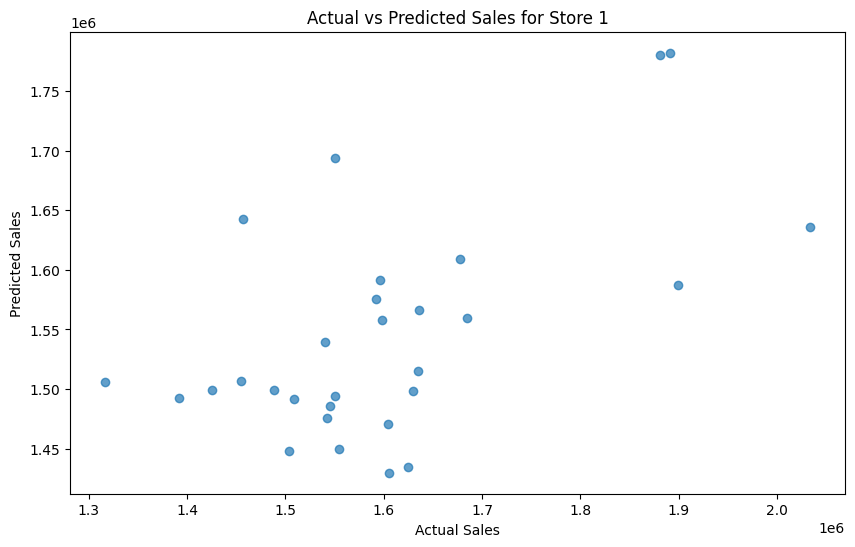

In [109]:
# Plotting Actual vs Predicted for the better model
best_model_pred = y_rf_pred if rf_r2 > lr_r2 else y_lr_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales for Store 1")
plt.show()

In [ ]:
# Observations from the Plot
# Spread:

# The points are scattered around the diagonal line but deviate significantly in some areas, indicating that the model struggles to predict sales accurately in certain cases.
# Clusters:

# There is a visible cluster of points in the lower range (sales around 1.4M to 1.6M).
# Outliers (points far from the diagonal) can be seen, particularly at the higher sales range (e.g., sales > 1.9M).
# Model Performance:

# The scatter indicates moderate accuracy, but the model is not perfectly capturing the sales trends.
# Variance between actual and predicted sales is more pronounced for higher sales values.
# Insights
# Model Bias:

# The model might be underestimating or overestimating sales in certain ranges.
# This can happen if the model does not capture non-linear relationships or if key predictors are missing.
# Outliers:

# Some extreme deviations suggest potential outliers in the data (weeks with unusually high or low sales).
# These outliers might need further investigation or handling (e.g., log transformation or removal).
# Prediction Quality:

# The model performs reasonably well for mid-range sales but struggles for extreme values.
# This could indicate the need for a more flexible model, such as ensemble methods (e.g., Random Forest or Gradient Boosting).
